## Bias variance tradeoff

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
df = pd.read_csv('../lab2/mnist.csv')
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.drop('id', axis='columns', inplace=True)

In [4]:
df.isnull().sum()

class       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
X = df.drop('class', axis='columns')
y = df['class']

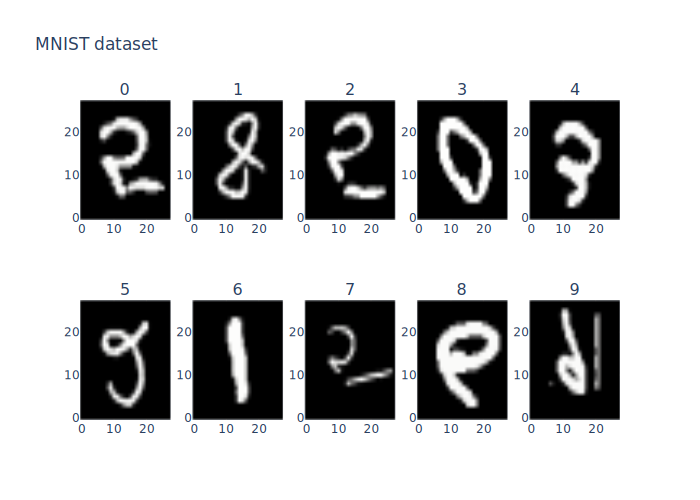

In [6]:
fig = make_subplots(rows=2, cols=5, subplot_titles=[str(i) for i in range(10)])

for i in range(10):
    fig.add_trace(
        go.Heatmap(
            z=X.iloc[i].values.reshape(28, 28),
            colorscale='gray',
            showscale=False,
        ),
        row=i // 5 + 1,
        col=i % 5 + 1,
    )

fig.update_layout(title_text="MNIST dataset")
fig.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, f1_score, confusion_matrix

In [8]:
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = range(1, 21)
mae_values = []
f1_values = []
fit_times = []
predict_times = []

for max_depth in max_depth_values:
    print(f'Training a decision tree with max_depth={max_depth}')
    start = time.time()
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    fit_times.append(time.time() - start)

    start = time.time()
    y_pred = model.predict(X_test)
    predict_times.append(time.time() - start)

    mae_values.append(mean_absolute_error(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred, average='weighted'))
    print(f'Time taken: {fit_times[-1]:.2f} and {predict_times[-1]:.2f}, MAE: {mae_values[-1]}, F1: {f1_values[-1]}')
    print()

Training a decision tree with max_depth=1
Time taken: 0.03 and 0.00, MAE: 2.75625, F1: 0.07544618836045604

Training a decision tree with max_depth=2
Time taken: 0.05 and 0.00, MAE: 2.3, F1: 0.21311250027845227

Training a decision tree with max_depth=3
Time taken: 0.07 and 0.00, MAE: 1.7725, F1: 0.43611697500833196

Training a decision tree with max_depth=4
Time taken: 0.10 and 0.00, MAE: 1.43, F1: 0.5724716325907135

Training a decision tree with max_depth=5
Time taken: 0.12 and 0.00, MAE: 1.2025, F1: 0.6678179015496449

Training a decision tree with max_depth=6
Time taken: 0.14 and 0.00, MAE: 0.94875, F1: 0.7273757754006023

Training a decision tree with max_depth=7
Time taken: 0.16 and 0.00, MAE: 0.97625, F1: 0.7326959950800709

Training a decision tree with max_depth=8
Time taken: 0.18 and 0.00, MAE: 0.83375, F1: 0.752052876246029

Training a decision tree with max_depth=9
Time taken: 0.20 and 0.00, MAE: 0.825, F1: 0.7558441282456392

Training a decision tree with max_depth=10
Tim

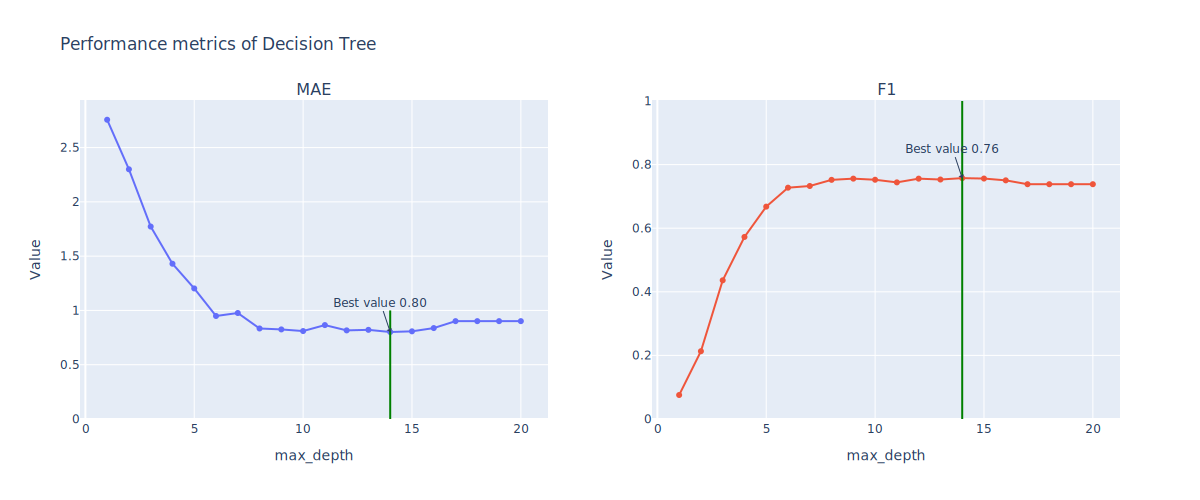

In [11]:
results = pd.DataFrame(
    {
        "max_depth": max_depth_values,
        "mae": mae_values,
        "f1": f1_values,
        "fit_time": fit_times,
        "predict_time": predict_times,
    }
)

fig = make_subplots(rows=1, cols=2, subplot_titles=["MAE", "F1"])

fig.add_trace(
    go.Scatter(
        x=results["max_depth"], y=results["mae"], mode="lines+markers", name="MAE"
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=results["max_depth"], y=results["f1"], mode="lines+markers", name="F1"
    ),
    row=1,
    col=2,
)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="max_depth", row=1, col=1)
fig.update_xaxes(title_text="max_depth", row=1, col=2)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=1, col=2)

# highlight the best value
best_mae = results["mae"].idxmin()
best_f1 = results["f1"].idxmax()
fig.add_shape(
    type="line",
    x0=results["max_depth"][best_mae],
    y0=0,
    x1=results["max_depth"][best_mae],
    y1=1,
    line=dict(color="green", width=2),
    row=1,
    col=1,
)
fig.add_shape(
    type="line",
    x0=results["max_depth"][best_f1],
    y0=0,
    x1=results["max_depth"][best_f1],
    y1=1,
    line=dict(color="green", width=2),
    row=1,
    col=2,
)

# adding a text with arrow on the best value, min and max values
fig.add_annotation(
    x=results["max_depth"][best_mae],
    y=results["mae"][best_mae],
    text=f"Best value {results['mae'][best_mae]:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1,
    col=1,
)
fig.add_annotation(
    x=results["max_depth"][best_f1],
    y=results["f1"][best_f1],
    text=f"Best value {results['f1'][best_f1]:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1,
    col=2,
)


fig.update_layout(title_text="Performance metrics of Decision Tree", showlegend=False)
fig.show(width=1200, height=500)